# Classification
## Weather Prediction for Australia:

This dataset contains daily weather observations from numerous Australian weather stations.We are trying to predict whether or not it will rain tomorrow by training a binary classification model on target variable 'RainTomorrow'. The target variable RainTomorrow means: Would it rain the next day? Yes or No. The dataset consists of about 142K observations from 24 variables.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
data= pd.read_csv("weatherAUS.csv")

In [28]:
data.head(5)
data.shape

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


(142193, 24)

There are 17 continuous variables and 6 categorical variables

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [30]:
# We see there are some columns with null values. 
# Before we start pre-processing, let's find out which of the columns have maximum null values
data.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [31]:
data.isnull().sum(axis=0)

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [32]:
# number of missing values for each row having more than 10 missing values

(data.isnull().sum(axis=1).sort_values(ascending=False) > 10).sum() 

1795

In [33]:
# Summary Stats for Categorical Variables
data.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2017-01-03,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [34]:
# Summary Stats for Continous variables
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


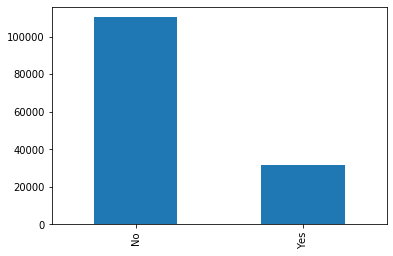

In [35]:
data['RainTomorrow'].value_counts().plot(kind='bar')

The above bar chart shows that the data is highly imbalanced. We have about 110K observations with 'No' and only 30K with 'yes'. Inorder, to avoid biasing in the prediction we will proceed with Sampling the dataset.

In [36]:
# parse the dates, currently coded as strings, into datetime format
data['Date'] = pd.to_datetime(data['Date'])
# extract year from date

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

We have divided the date column into 3 different columns as 'day', 'month' and 'year' to know which day of month in a particular year has more rainfall.

In [37]:
data.drop(["Date"],inplace=True, axis=1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-null floa

Outliers in numerical variables

In [39]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 20 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Year', 'Month', 'Day']


In [40]:
# view summary statistics in numerical variables

print(round(data[numerical].describe()),2)


        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, '')

Text(0, 0.5, 'Rainfall')

Text(0.5, 1.0, '')

Text(0, 0.5, 'Evaporation')

Text(0.5, 1.0, '')

Text(0, 0.5, 'WindSpeed9am')

Text(0.5, 1.0, '')

Text(0, 0.5, 'WindSpeed3pm')

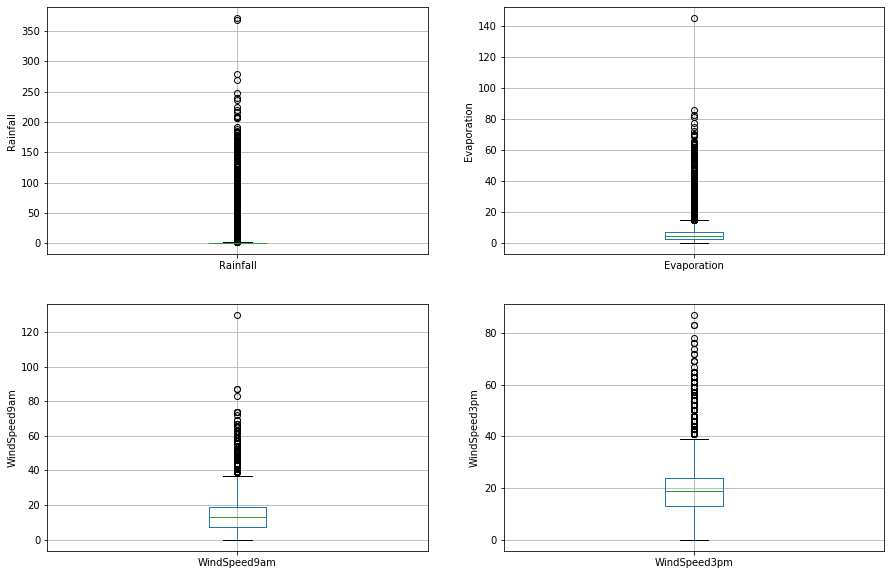

In [41]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

The above boxplots confirm that there are lot of outliers in these variables.

Checking the distribution of variables: Now, we will plot the histograms to check distributions to find out if they are normal or skewed.

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Rainfall')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'Evaporation')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'WindSpeed9am')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

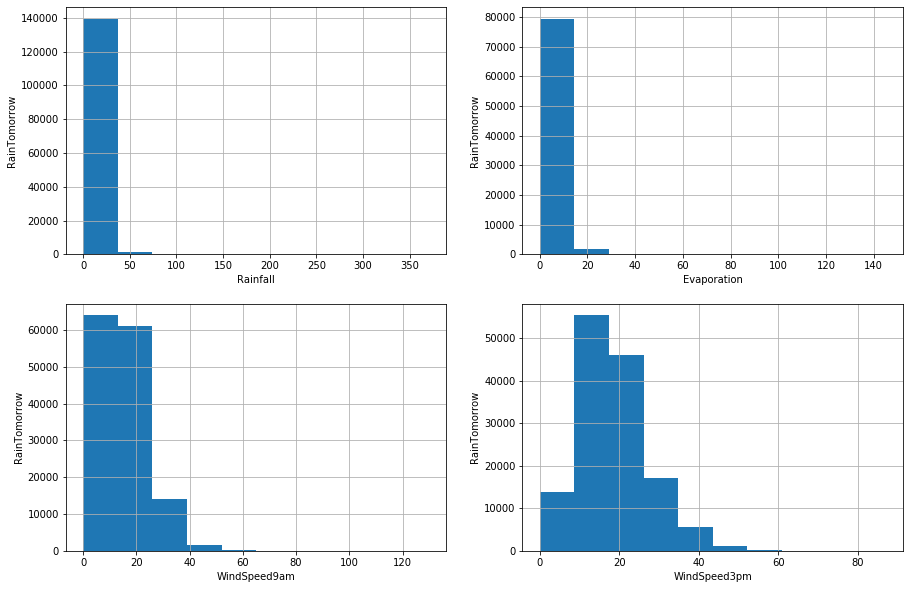

In [42]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed.

In [43]:
correlation = data.corr()

<Figure size 1152x864 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap of Rain in Australia Dataset')

[Text(0.5, 0, 'MinTemp'),
 Text(1.5, 0, 'MaxTemp'),
 Text(2.5, 0, 'Rainfall'),
 Text(3.5, 0, 'Evaporation'),
 Text(4.5, 0, 'Sunshine'),
 Text(5.5, 0, 'WindGustSpeed'),
 Text(6.5, 0, 'WindSpeed9am'),
 Text(7.5, 0, 'WindSpeed3pm'),
 Text(8.5, 0, 'Humidity9am'),
 Text(9.5, 0, 'Humidity3pm'),
 Text(10.5, 0, 'Pressure9am'),
 Text(11.5, 0, 'Pressure3pm'),
 Text(12.5, 0, 'Cloud9am'),
 Text(13.5, 0, 'Cloud3pm'),
 Text(14.5, 0, 'Temp9am'),
 Text(15.5, 0, 'Temp3pm'),
 Text(16.5, 0, 'RISK_MM'),
 Text(17.5, 0, 'Year'),
 Text(18.5, 0, 'Month'),
 Text(19.5, 0, 'Day')]

[Text(0, 0.5, 'MinTemp'),
 Text(0, 1.5, 'MaxTemp'),
 Text(0, 2.5, 'Rainfall'),
 Text(0, 3.5, 'Evaporation'),
 Text(0, 4.5, 'Sunshine'),
 Text(0, 5.5, 'WindGustSpeed'),
 Text(0, 6.5, 'WindSpeed9am'),
 Text(0, 7.5, 'WindSpeed3pm'),
 Text(0, 8.5, 'Humidity9am'),
 Text(0, 9.5, 'Humidity3pm'),
 Text(0, 10.5, 'Pressure9am'),
 Text(0, 11.5, 'Pressure3pm'),
 Text(0, 12.5, 'Cloud9am'),
 Text(0, 13.5, 'Cloud3pm'),
 Text(0, 14.5, 'Temp9am'),
 Text(0, 15.5, 'Temp3pm'),
 Text(0, 16.5, 'RISK_MM'),
 Text(0, 17.5, 'Year'),
 Text(0, 18.5, 'Month'),
 Text(0, 19.5, 'Day')]

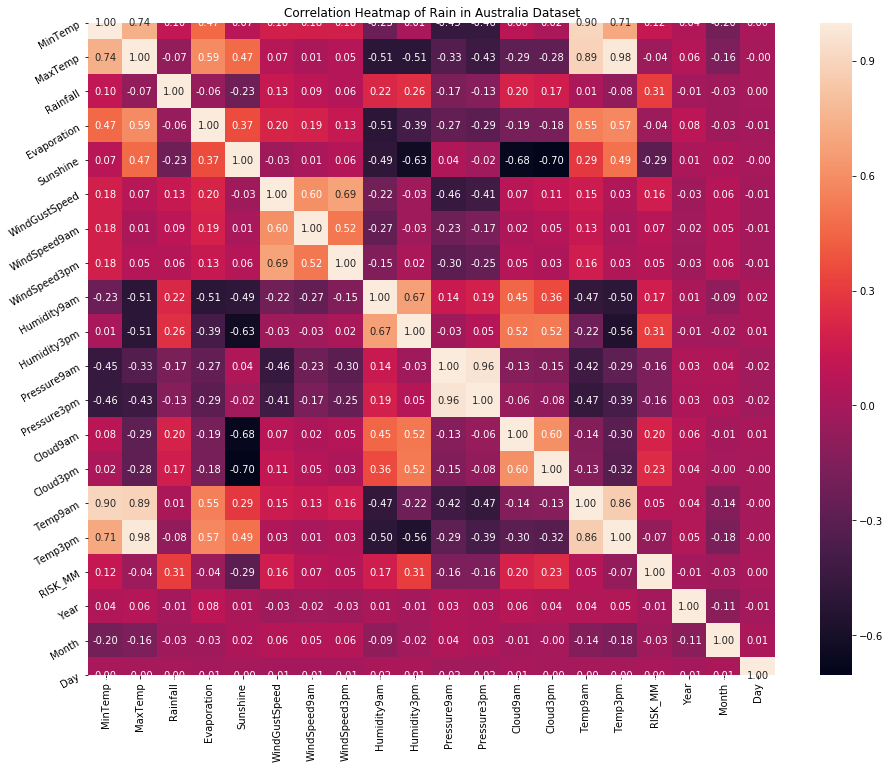

In [44]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Interpretation
From the above correlation heat map, we can conclude that :-

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).



Pair Plot First of all, I will define extract the variables which are highly positively correlated.

In [45]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

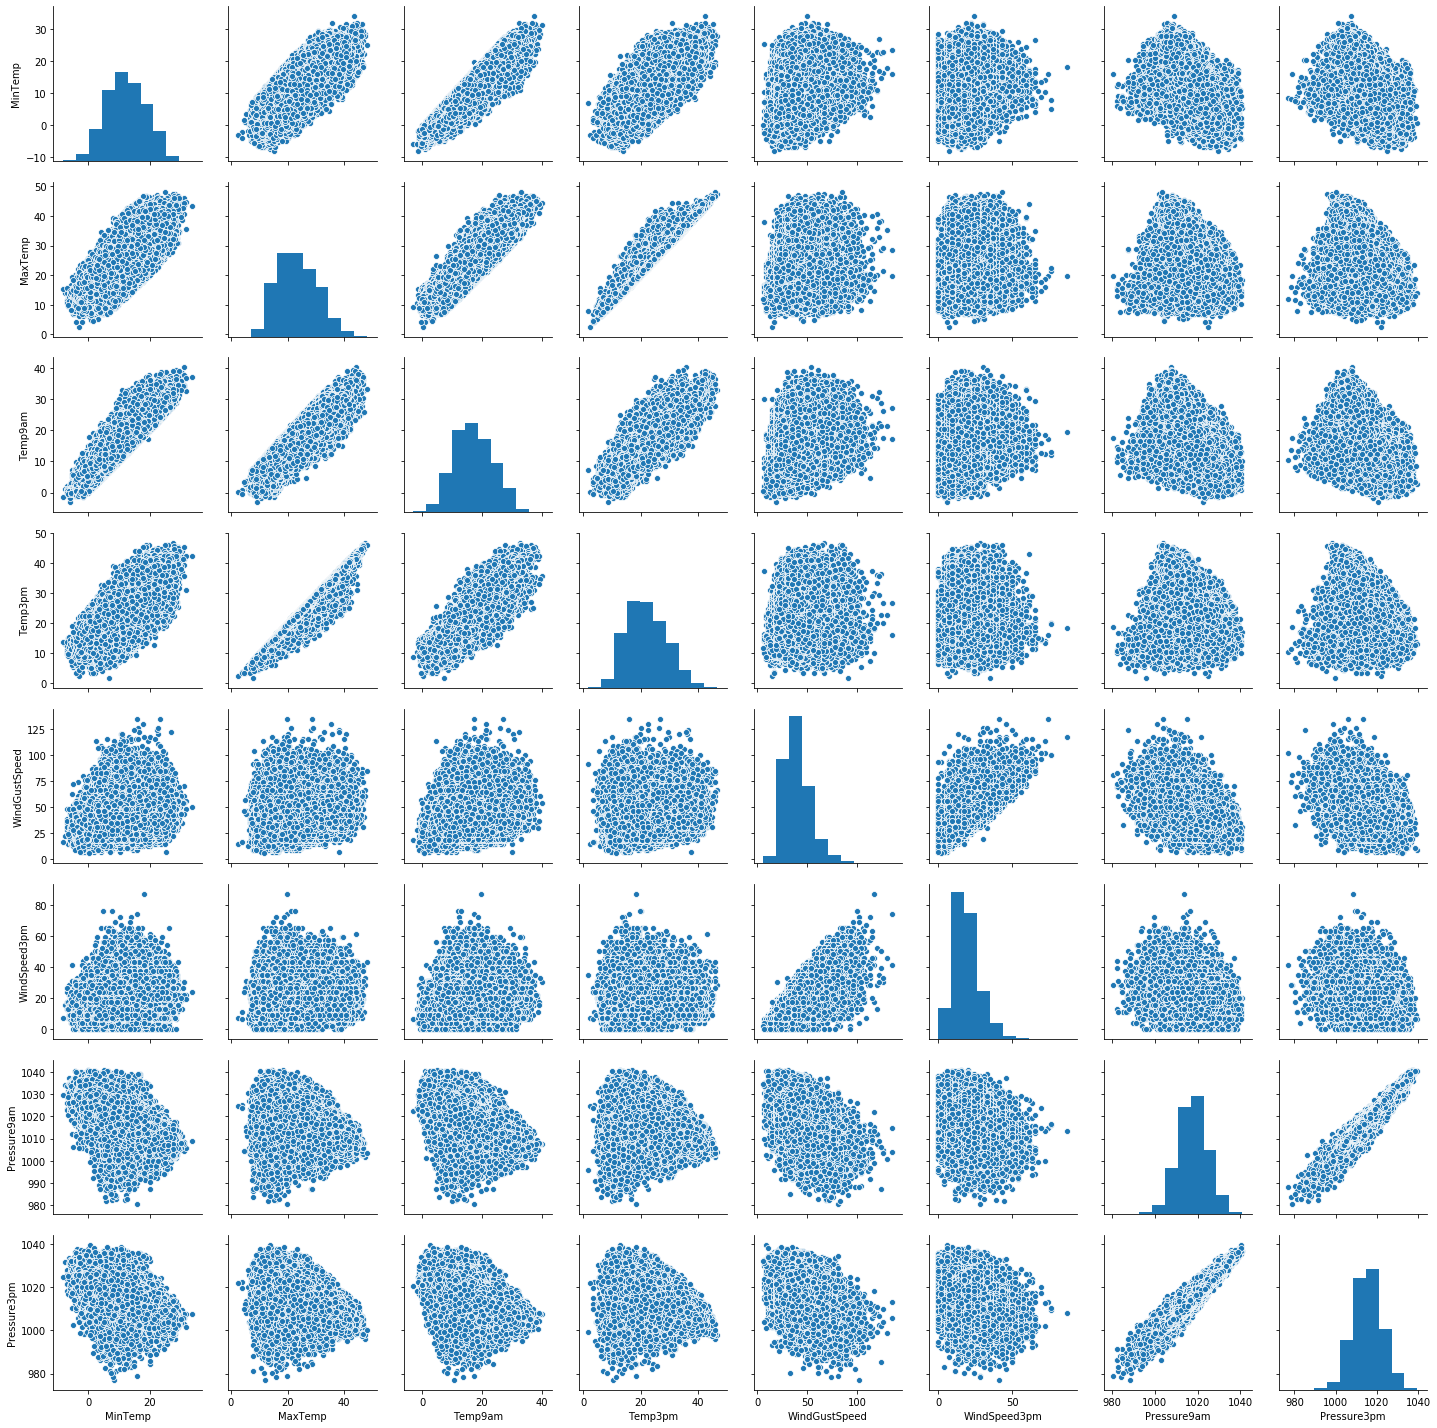

In [46]:
sns.pairplot(data[num_var].dropna(), kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

Interpretation
We have defined a variable num_var which consists of MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed3pm, Pressure9am and Pressure3pm variables.

The above pair plot shows relationship between these variables.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-null floa

# Data Imputation

In [48]:
miss = pd.DataFrame(data.isna().sum()[data.isna().sum() !=0].sort_values(ascending=False))
miss.columns = ['#Missing']
miss['Percent_Missing'] = data.isna().sum()/len(data) *100
miss

,#Missing,Percent_Missing
Sunshine,67816,47.692924
Evaporation,60843,42.789026
Cloud3pm,57094,40.152469
Cloud9am,53657,37.735332
Pressure9am,14014,9.855619
Pressure3pm,13981,9.832411
WindDir9am,10013,7.041838
WindGustDir,9330,6.561504
WindGustSpeed,9270,6.519308
WindDir3pm,3778,2.656952


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of missing values')

Text(0.5, 1.0, 'Percent missing data by feature')

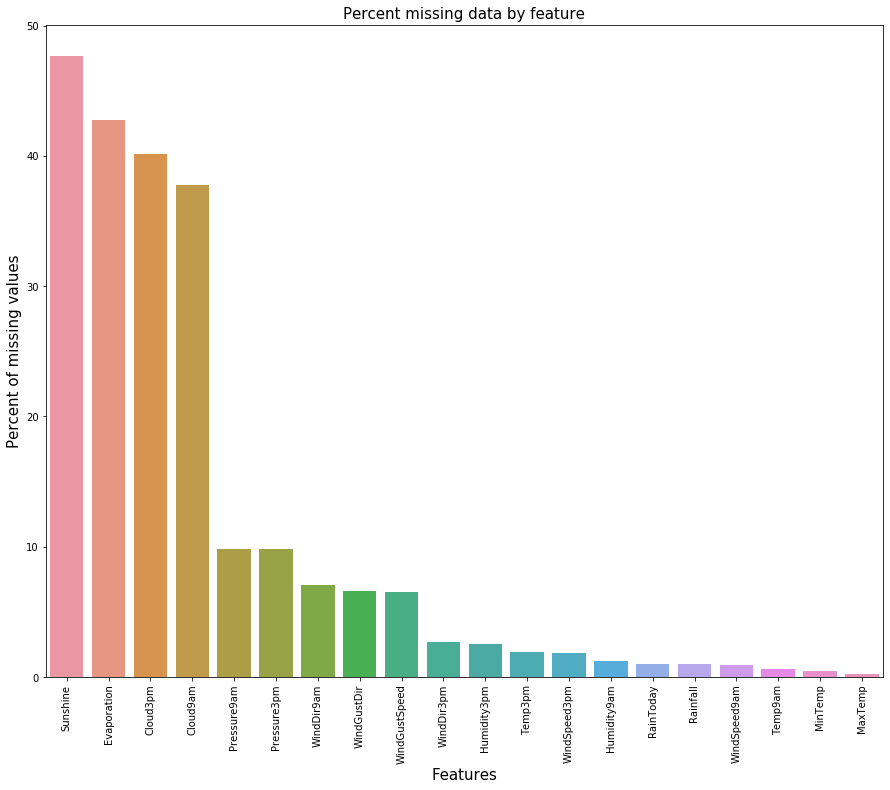

In [49]:
data_na = (data.isnull().sum() / len(data)) * 100
data_miss = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=data_miss.index, y=data_miss)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

The above plot shows the percentage of missing values of each variable in descending order.

In [50]:
#It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description. 
#So, we should drop it as follows-
data.drop(["RISK_MM"],inplace=True, axis=1)

Next, dropping highly correlated variables as per the interpretation from correlation matrix.

In [51]:
data.drop(['Cloud9am','Pressure9am','WindDir9am','WindSpeed9am','Humidity9am','Temp9am','MaxTemp','Year','Day'],inplace=True,axis=1)

We grouped variable Sunshine by month and imputed the missing values with median as it will be appropriate. Similarly, we did the same for rest of the variables.

In [52]:
for c in ('Sunshine', 'Evaporation', 'Cloud3pm', 'Pressure3pm'):
    data[c] = data.groupby("Month")[c].transform(lambda x: x.fillna(x.median()))

Missing information in 'WindDir3pm', 'WindGustDir' variables indicates there is no diection of wind at that time. So, we imputed those with none.

In [53]:
for c in ('WindDir3pm', 'WindGustDir'):
    data[c] = data[c].fillna('None')

In [54]:
for c in ('WindGustSpeed', 'WindSpeed3pm'):
    data[c] = data.groupby('Month')[c].transform(lambda x: x.fillna(x.mean()))

In [55]:
for c in ('MinTemp', 'Humidity3pm', 'Temp3pm', 'Rainfall'):
    data[c] = data.groupby("Location")[c].transform(lambda x: x.fillna(x.median()))

We are imputing RainToday variable missing values with majority class i.e No

In [56]:
data['RainToday'] = data['RainToday'].fillna('No')

In [57]:
data['Rainfall'].describe()

count    142193.000000
mean          2.326868
std           8.426391
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         371.000000
Name: Rainfall, dtype: float64

In [58]:
data.groupby(['Location'])['RainToday'].describe()

,count,unique,top,freq
Location,,,,
Adelaide,3090,2,No,2414
Albany,3016,2,No,2123
Albury,3011,2,No,2396
AliceSprings,3031,2,No,2790
BadgerysCreek,2928,2,No,2356
Ballarat,3028,2,No,2250
Bendigo,3034,2,No,2472
Brisbane,3161,2,No,2457
Cairns,2988,2,No,2047


In [59]:
data.isnull().sum(axis=0)

Location         0
MinTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
WindSpeed3pm     0
Humidity3pm      0
Pressure3pm      0
Cloud3pm         0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

In [60]:
data.shape

(142193, 16)

### Random sample

As the data has 142193 rows, running machine learning models on this data is a lot of time consuming. So, we are taking a sample of 20000 onservations for this classification project and running ML algorithms.

In [61]:
from random import sample
data_sample = data.sample(n=20000, replace=False, random_state=None,axis=0)

In [62]:
y = pd.DataFrame(data_sample['RainTomorrow'])
data_all = data_sample
data_all.drop(['RainTomorrow'], axis=1, inplace=True)
print("data_all size is : {}".format(data_all.shape))

data_all size is : (20000, 15)


In [63]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder() 
lbl.fit(list(y['RainTomorrow'].values)) 
y['RainTomorrow'] = lbl.transform(list(y['RainTomorrow'].values))

LabelEncoder()

In [64]:
data_all = pd.get_dummies(data_all)

In [65]:
data_all.shape

(20000, 96)

In [66]:
y.head()
y.shape

,RainTomorrow
87381,0
18069,1
124273,0
132661,0
108621,1


(20000, 1)

### Treating Imbalance in the dataset

In [67]:
y['RainTomorrow'].value_counts()

0    15514
1     4486
Name: RainTomorrow, dtype: int64

Here the data is highly imbalanced as we can see the large difference between 0 and 1.

So, we are using SMOTE technique to balance the data as it is best method compared to undersampling and over sampling.

In [68]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_SMOTE, Y_SMOTE = sm.fit_resample(data_all, y)
pd.Series(Y_SMOTE).value_counts()

1    15514
0    15514
dtype: int64

# Model Estimation

In this project, we are using F1 score and accuracy as the metrics to evaluate the models because F1 Score is a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X_SMOTE, Y_SMOTE, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [46]:
y_train

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
cols = X_.columns

### Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression

c_range = [0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
train_score_l1,test_score_l1

([0.7772359810085975,
  0.7890842208819882,
  0.7931476966508405,
  0.7929766029342572,
  0.7932332435091322],
 [0.7801873476196587,
  0.7900680097523418,
  0.793276016938278,
  0.793019376363403,
  0.7928910560759657])

In [49]:
min_list=[]
for x in range(0,5):
#     print(x,train_score_l1[x]-test_score_l1[x])
    ans_1=abs(train_score_l1[x]-test_score_l1[x])
    min_list.append(ans_1)
print(min_list)

[0.0029513666110612125, 0.0009837888703536635, 0.0001283202874374778, 4.2773429145825936e-05, 0.00034218743316649647]


In [50]:
train_score_l2,test_score_l2

([0.7763377389965354,
  0.7896830488900295,
  0.7934471106548612,
  0.793276016938278,
  0.7932332435091322],
 [0.773643012960349,
  0.7878865648659052,
  0.7916078532015912,
  0.7928910560759657,
  0.7928910560759657])

In [51]:
min_list1=[]
for x in range(0,5):
#     print(x,train_score_l1[x]-test_score_l1[x])
    ans_1=abs(train_score_l2[x]-test_score_l2[x])
    min_list1.append(ans_1)
print(min_list1)

[0.002694726036186368, 0.0017964840241242452, 0.0018392574532699602, 0.0003849608623123224, 0.00034218743316649647]


Text(0.5, 0, 'Regularization parameter: C')

Text(0, 0.5, 'Accuracy')

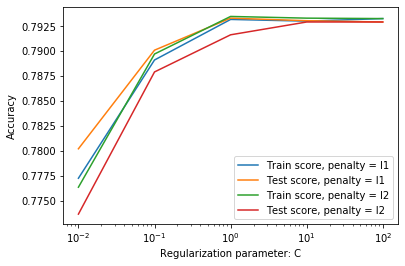

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### CV with Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":[0.01, 0.1, 1, 10, 100], "penalty":["l1","l2"]}

logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=2, scoring='f1')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

tuned hpyerparameters :(best parameters)  {'C': 100, 'penalty': 'l1'}
accuracy : 0.7893723227438021


In [54]:
y_true, y_pred = y_test , logreg_cv.predict(X_test)

In [55]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7920639010564288

### Decision tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy on training set: 1.000
Accuracy on test set: 0.845


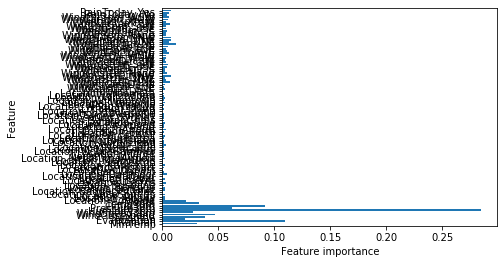

In [57]:
%matplotlib inline

def plot_feature_importances_risk(model):
    n_features = data_all.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_all.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_risk(dtree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

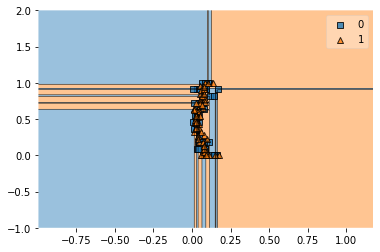

In [58]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:150,[2,10]]
y_b = y_train[:150]

dtree1 = DecisionTreeClassifier()
dtree1.fit(X_b, y_b)

plot_decision_regions(np.array(X_b), np.array(y_b), clf = dtree1)

### Gridsearch and CV on Decision tree classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model= DecisionTreeClassifier(random_state=0)
#Hyper Parameters Set
params = {'min_samples_split': [2,4,6], 
          'min_samples_leaf':[1,3,5],
          'random_state':[0]}
#Making models with hyper parameters sets
dt = GridSearchCV(model, param_grid=params,cv=2, n_jobs=-1, scoring='f1')
#Learning
dt.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",dt.best_params_)
print("accuracy :",dt.best_score_)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6], 'random_state': [0]},
      

tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
accuracy : 0.8206678753182431


In [60]:
Y_true, Y_pred = y_test, dt.predict(X_test)

In [61]:
f1_score(Y_true, Y_pred)

0.8463790250731832

### Linear SVC

In [62]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

0.793276016938278

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

0.7939176183754652

### Gridsearch and CV on Linear SVC

In [63]:
from sklearn.svm import LinearSVC

model = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1]}

svc = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

print("tuned hpyerparameters :(best parameters) ",svc.best_params_)
print("accuracy :",svc.best_score_)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

0.7925600619994833

tuned hpyerparameters :(best parameters)  {'C': 1}
accuracy : 0.7882152463977135


### KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [65]:
Y_true, Y_pred = y_test, knn.predict(X_test)

In [66]:
f1_score(Y_true, Y_pred)

0.7827154979901741

Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

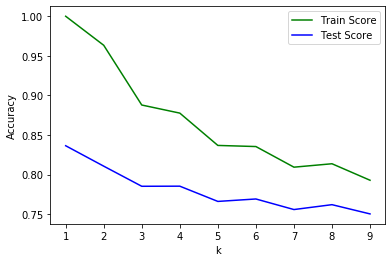

In [67]:
x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

From the graph we can see that for k value 8 the test accuracy is highest with minimum distance between train and test scores.

In [68]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

Train score: 0.8136
Test score: 0.7620


### KNN classifier with Gridsearch and CV

In [69]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9],
          'leaf_size':[2,3,5],
          'weights':['uniform', 'distance']
         }

knn = GridSearchCV(model, param_grid=params,cv=2, n_jobs=-1,iid = False,scoring='f1')
knn.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",knn.best_params_)
print("accuracy :",knn.best_score_)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=-1,
             param_grid={'leaf_size': [2, 3, 5],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

tuned hpyerparameters :(best parameters)  {'leaf_size': 2, 'n_neighbors': 9, 'weights': 'distance'}
accuracy : 0.8061058689830429


In [70]:
Y_true, Y_pred = y_test, knn.predict(X_test)

In [71]:
f1_score(Y_true, Y_pred)

0.8223489167616875

### SVM both simple and with kernels (rbf, poly, linear) with gridseach and CV

### Linear Kernel

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(max_iter=1000)
param_grid = {'C':[0.001, 0.01, 0.1, 1], 'gamma' : [0.01, 1, 10],
             'kernel': ['linear']}

svc_lnr = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
svc_lnr.fit(X_train, y_train)
svc_lnr.score(X_test, y_test)

print("tuned hpyerparameters :(best parameters) ",svc_lnr.best_params_)
print("accuracy :",svc_lnr.best_score_)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=1000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'gamma': [0.01, 1, 10],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

0.7508936778674292

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
accuracy : 0.745788704647493


### RBF Kernel

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(max_iter=1000)
param_grid = {'C':[0.001, 0.01, 0.1, 1], 'gamma' : [0.01, 1,10],
             'kernel': ['rbf']}

svc_rbf = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
svc_rbf.fit(X_train, y_train)
svc_rbf.score(X_test, y_test)

print("tuned hpyerparameters :(best parameters) ",svc_rbf.best_params_)
print("accuracy :",svc_rbf.best_score_)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=1000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'gamma': [0.01, 1, 10],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

0.6902882911902077

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
accuracy : 0.831075625485227


### Poly Kernel

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(max_iter=1000)
param_grid = {'C':[0.001, 0.01, 0.1, 1], 'gamma' : [0.01, 1,10], 'degree':[1,2,3],
             'kernel': ['poly']}

svc_poly = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
svc_poly.fit(X_train, y_train)
svc_poly.score(X_test, y_test)

print("tuned hpyerparameters :(best parameters) ",svc_poly.best_params_)
print("accuracy :",svc_poly.best_score_)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=1000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [1, 2, 3],
                         'gamma': [0.01, 1, 10], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

0.8086457442911223

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
accuracy : 0.8027188544414442


In [79]:
# Summary of Model performance

d = [['logistic',0.7893723227438021,0.7920639010564288],
['KNN',0.8061058689830429,0.8223489167616875],
['Decision Tree',0.8206678753182431,0.8463790250731832],
['LinearSVC',0.7882152463977135,0.7925600619994833],
['SVC(Kernel=linear)',0.745788704647493,0.7508936778674292],
['SVC(Kernel=rbf)',0.831075625485227,0.6902882911902077],
['SVC(Kernel=poly)',0.8027188544414442,0.8086457442911223]]
c = ['Model', 'Accuracy', 'F1-Score']
x = pd.DataFrame(d, columns=c)
x.head(7)

,Model,Accuracy,F1-Score
0,logistic,0.789372,0.792064
1,KNN,0.806106,0.822349
2,Decision Tree,0.820668,0.846379
3,LinearSVC,0.788215,0.792560
4,SVC(Kernel=linear),0.745789,0.750894
5,SVC(Kernel=rbf),0.831076,0.690288
6,SVC(Kernel=poly),0.802719,0.808646


<Figure size 864x432 with 0 Axes>

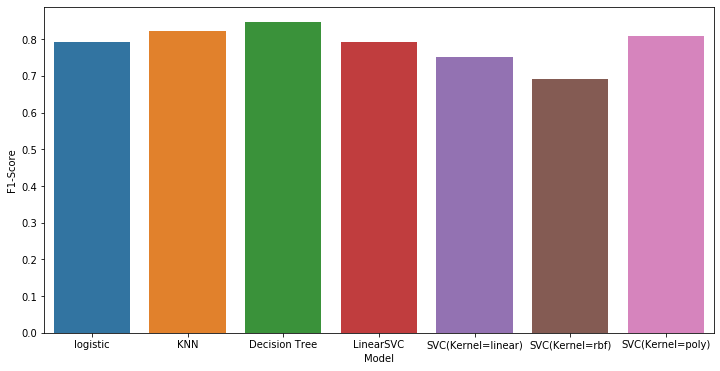

In [80]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y = 'F1-Score', data=x)

<Figure size 864x432 with 0 Axes>

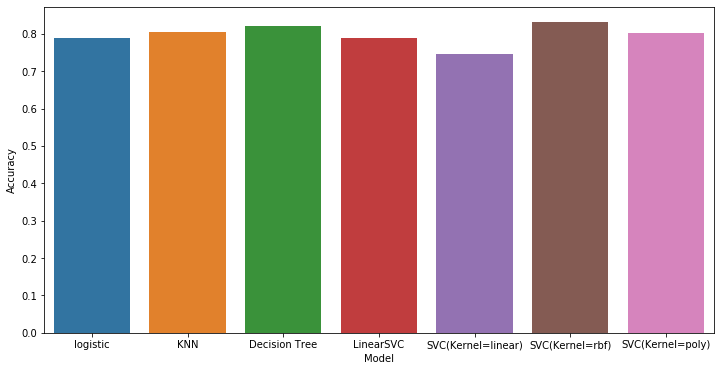

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y = 'Accuracy', data=x)

## Conclusion:

#### From our analysis, the best Classification model using Gridsearch and cross validation is Decision tree classifier with an accuracy of 82% and the best optimal hyperparameters used for Decision tree classifier are {'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}.

